In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def normalize(v):
    ss = np.sum(v**2)
    return v / np.sqrt(ss)

def gaussian_kernel_to_dist(k, sigma):
    return np.sqrt(-2 * sigma**2 * np.log(k))


In [50]:
np.random.seed(123)
n, r = 7, 3

In [53]:
while True:
    Lambda = np.abs(np.random.normal(0, 1, (n, r)))
    Lambda = np.apply_along_axis(normalize, 1, Lambda)

    K = Lambda @ Lambda.T
    np.fill_diagonal(K, 1)

    D = np.vectorize(lambda k: gaussian_kernel_to_dist(k, 1))(K)

    MTM = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            MTM[i, j] = (D[0, j]**2 + D[i, 0]**2 - D[i, j]**2) / 2

    eigenvalues1 = np.linalg.eigvals(K)
    eigvals, eigvecs = np.linalg.eigh(MTM)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    M = np.sqrt(np.diag(eigvals[:r+1])) @ eigvecs[:, :r+1].T
    thres = np.max(np.abs(M * (M < 0)))

    v = np.full((r+1,), thres)
    M += np.outer(v, np.ones(n))

    # M to K
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            d2 = np.sum((M[:, i] - M[:, j])**2)
            K[i, j] = np.exp(-d2 / 10)

    if np.linalg.eigvals(K)[r-1] < 1e-3:
        break

print(np.linalg.eigvals(M.T @ M))
eigvals, eigvecs = np.linalg.eigh(K)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
print(eigvals)
M,K

[ 2.90172434e+01  1.76281809e+00  1.26494109e-02  4.73907387e-03
 -3.18264622e-15  3.41692669e-16 -4.31002971e-16]
[6.63364074e+00 3.57065836e-01 3.69144666e-03 3.53805683e-03
 1.85174699e-03 1.93574030e-04 1.85966764e-05]


(array([[1.1239382 , 0.51694921, 1.09755627, 1.36131049, 0.27588831,
         0.01055769, 0.        ],
        [1.1239382 , 1.10239676, 1.01104989, 1.03568885, 1.09844495,
         1.20713327, 1.05640553],
        [1.1239382 , 1.15384736, 1.06646743, 1.18009671, 1.17224897,
         1.1085051 , 1.09983109],
        [1.1239382 , 1.1239382 , 1.1239382 , 1.1239382 , 1.1239382 ,
         1.1239382 , 1.1239382 ]]),
 array([[1.        , 0.96369597, 0.99832713, 0.99329385, 0.93032877,
         0.88278149, 0.88087646],
        [0.96369597, 1.        , 0.96530766, 0.93070911, 0.9941706 ,
         0.973414  , 0.97314037],
        [0.99832713, 0.96530766, 1.        , 0.99172592, 0.93295661,
         0.88499067, 0.88622891],
        [0.99329385, 0.93070911, 0.99172592, 1.        , 0.88850578,
         0.83035233, 0.83027044],
        [0.93032877, 0.9941706 , 0.93295661, 0.88850578, 1.        ,
         0.99140943, 0.99172185],
        [0.88278149, 0.973414  , 0.88499067, 0.83035233, 0.99140943,
  

No handles with labels found to put in legend.


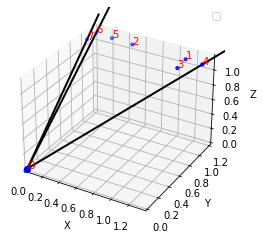

In [91]:
import numpy as np
import matplotlib.pyplot as plt

x, y, z, w = M

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, color='blue', s=10)

# Plot the origin
ax.scatter(0, 0, 0, color='blue', s=150, marker='.')
ax.text(0,0,0,'O',color='red')

# Labeling
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_title('3D Scatter Plot with Extended Rays from Origin')
ax.legend()

# Adjust axis limits to ensure the origin is visible
x_min, x_max = min(x.min(), 0), max(x.max(), 0)
y_min, y_max = min(y.min(), 0), max(y.max(), 0)
z_min, z_max = min(z.min(), 0), max(z.max(), 0)

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])

# Annotate points
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'{i+1}', color='red')

# Function to plot an extended ray
def plot_extended_ray(point_index, color, label, scale=1.2):
    # Calculate the extended point by scaling
    x_ext = x[point_index] * scale
    y_ext = y[point_index] * scale
    z_ext = z[point_index] * scale
    
    # Plot the ray from origin to extended point
    ax.plot([0, x_ext], [0, y_ext], [0, z_ext], color=color, linewidth=2, label=label)

# Add extended rays
plot_extended_ray(3, 'black', 'Extended Ray to Point 4')
plot_extended_ray(5, 'black', 'Extended Ray to Point 6')
plot_extended_ray(6, 'black', 'Extended Ray to Point 7')



plt.show()


In [76]:
print(K[:,0])
print(K[:,1])
print(K[:,2])
print(K[:,3])
print(K[:,4])
print(K[:,5])
print(K[:,6])


[1.         0.96369597 0.99832713 0.99329385 0.93032877 0.88278149
 0.88087646]
[0.96369597 1.         0.96530766 0.93070911 0.9941706  0.973414
 0.97314037]
[0.99832713 0.96530766 1.         0.99172592 0.93295661 0.88499067
 0.88622891]
[0.99329385 0.93070911 0.99172592 1.         0.88850578 0.83035233
 0.83027044]
[0.93032877 0.9941706  0.93295661 0.88850578 1.         0.99140943
 0.99172185]
[0.88278149 0.973414   0.88499067 0.83035233 0.99140943 1.
 0.99771207]
[0.88087646 0.97314037 0.88622891 0.83027044 0.99172185 0.99771207
 1.        ]


In [83]:
import numpy as np

def project_and_residual(v, x, y):
    # Form the matrix with x and y as columns
    X = np.column_stack((x, y))
    
    # Compute the projection using the least squares solution
    coeffs = np.linalg.lstsq(X, v, rcond=None)[0]
    projection = X @ coeffs
    
    # Compute the residual
    residual = v - projection
    
    return projection, residual, coeffs




In [84]:
proj0, res0, coef0 = project_and_residual(K[:,0], K[:,3], K[:,6])
proj1, res1, coef1 = project_and_residual(K[:,1], K[:,3], K[:,6])
proj2, res2, coef2 = project_and_residual(K[:,2], K[:,3], K[:,6])
proj4, res4, coef4 = project_and_residual(K[:,4], K[:,3], K[:,6])
proj5, res5, coef5 = project_and_residual(K[:,5], K[:,3], K[:,6])

print("Projection:", proj0)
print("Projection:", proj1)
print("Projection:", proj2)
print("Projection:", proj4)
print("Projection:", proj5)
print("Residual:", res0)
print("Residual:", res1)
print("Residual:", res2)
print("Residual:", res4)
print("Residual:", res5)
print("L2 Norm:", np.linalg.norm(res0))
print("L2 Norm:", np.linalg.norm(res1))
print("L2 Norm:", np.linalg.norm(res2))
print("L2 Norm:", np.linalg.norm(res4))
print("L2 Norm:", np.linalg.norm(res5))

Projection: [0.99858627 0.96249286 0.99823407 0.9950617  0.93023221 0.88221851
 0.8825647 ]
Projection: [0.96267368 0.99764109 0.9655176  0.93257608 0.99298322 0.97387235
 0.97532055]
Projection: [0.99821866 0.96440582 0.99797005 0.99382764 0.93301643 0.88590362
 0.88628591]
Projection: [0.92961617 0.99236147 0.93368481 0.88946133 0.99884749 0.9916815
 0.99354291]
Projection: [0.88111726 0.97321244 0.88646232 0.83057163 0.9917255  0.9976418
 0.99992726]
Residual: [ 1.41372884e-03  1.20310699e-03  9.30648341e-05 -1.76784524e-03
  9.65538117e-05  5.62977451e-04 -1.68824346e-03]
Residual: [ 0.00102229  0.00235891 -0.00020993 -0.00186696  0.00118738 -0.00045835
 -0.00218019]
Residual: [ 1.08478940e-04  9.01847392e-04  2.02995482e-03 -2.10171766e-03
 -5.98181533e-05 -9.12952725e-04 -5.70043244e-05]
Residual: [ 0.00071259  0.00180913 -0.0007282  -0.00095554  0.00115251 -0.00027206
 -0.00182106]
Residual: [ 0.00166423  0.00020155 -0.00147165 -0.00021929 -0.00031606  0.0023582
 -0.00221519]
L2

In [90]:
#K = WH
W = np.column_stack((K[:,3], K[:,6]))
H = np.column_stack((coef0,coef1,coef2,np.array([1,0]),coef4,coef5,np.array([0,1])))
np.linalg.norm(K - W @ H, 'fro')

0.007874450471857591

In [92]:
W,H

(array([[0.99329385, 0.88087646],
        [0.93070911, 0.97314037],
        [0.99172592, 0.88622891],
        [1.        , 0.83027044],
        [0.88850578, 0.99172185],
        [0.83035233, 0.99771207],
        [0.83027044, 1.        ]]),
 array([[0.84433759, 0.39528684, 0.8304195 , 1.        , 0.20779594,
         0.00116395, 0.        ],
        [0.18153616, 0.64712557, 0.19681314, 0.        , 0.82101609,
         0.99896086, 1.        ]]))